In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

# Combine the data into a single dataset
city_ride_df = pd.merge(city_df,ride_df,how='outer', on='city')
# Display the data table for preview
city_ride_df.head()
#try filer record to check the exepected result
#df[df['column'] == value]
#city_ride_df[city_ride_df['ride_id'] == 5739410935873]

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

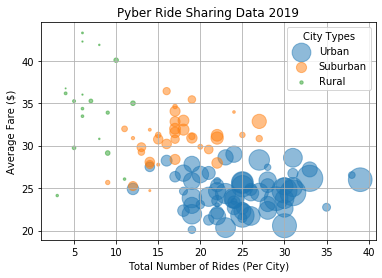

In [3]:
# Obtain the x and y coordinates for each of the three city types

#City Type get unique city type
city_type = city_ride_df.type.unique()  
  


for x in range(len(city_type)):
     type_df= city_ride_df[city_ride_df['type'] == city_type[x]]
     colors = np.random.rand(x)
     # Total Number of Rides Per City
     tot_rides = type_df.groupby('city').count()['ride_id']
     # Total Number of Drivers Per City
     tot_driver = type_df.groupby('city').sum()['driver_count']
     # Average Fare ($) Per City
     avg_fare = type_df.groupby('city').mean()['fare']
     # Plot Chart
     # size per total number of drivers per city
     plt.scatter(tot_rides, avg_fare,s=tot_driver*.3,alpha=0.5,label=city_type[x]) 
     # Incorporate the other graph properties
     # Create a legend
     plt.legend(title="City Types") 
     plt.grid(True)



# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("Pyber Ride Sharing Data 2019")

# Save Figure 
plt.savefig('PyberRideSharingData2019.png')
plt.show()

## Total Fares by City Type

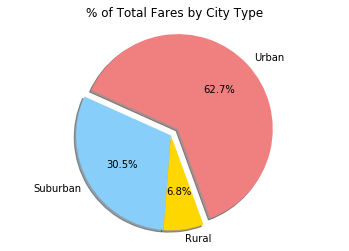

In [97]:
# % of Total Fares by City Type
total_fares = city_ride_df["fare"].sum()
city_type = city_ride_df.type.unique()  

city_fare_pct= []
# calculate the fare per city type 
for x in range(len(city_type)):
    city_fare_pct.append((city_ride_df.loc[city_ride_df["type"] == city_type[x] , "fare"].sum())/total_fares*100)
    

# Pie chart
labels = city_ride_df.type.unique() 
sizes = city_fare_pct
colors = ["lightcoral", "lightskyblue" ,"gold"]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=290, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Fares by City Type")
plt.savefig('PctOfTotalFaresByCityType.png')
plt.show()
 

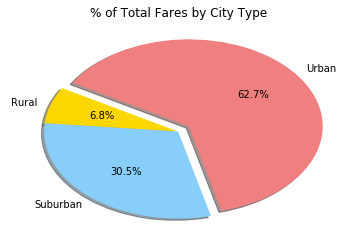

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

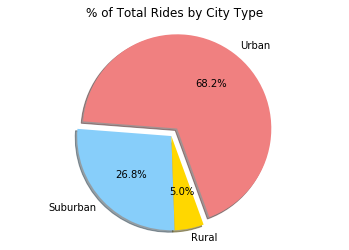

In [99]:
# % of Total Rides by City Type
total_ride = city_ride_df["fare"].sum()
city_type = city_ride_df.type.unique()  

city_ride_pct= []
# calculate the fare per city type 
for x in range(len(city_type)):
    city_ride_pct.append((city_ride_df.loc[city_ride_df["type"] == city_type[x] , "ride_id"].sum())/total_ride*100)
    

# Pie chart
labels = city_ride_df.type.unique() 
sizes = city_ride_pct
colors = ["lightcoral", "lightskyblue" ,"gold"]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=290, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Rides by City Type")
plt.savefig('PctOfTotalRidesByCityType.png')
plt.show()


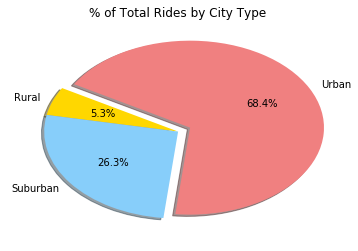

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

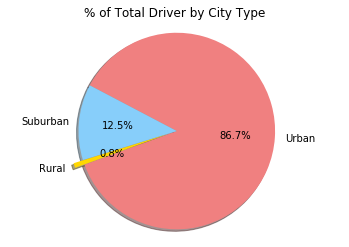

In [106]:
# % of Total Drivers by City Type
total_driver = city_ride_df["driver_count"].sum()
city_type = city_ride_df.type.unique()  

city_ride_pct= []
# calculate the fare per city type 
for x in range(len(city_type)):
    city_ride_pct.append((city_ride_df.loc[city_ride_df["type"] == city_type[x] , "driver_count"].sum())/total_driver*100)
    

# Pie chart
labels = city_ride_df.type.unique() 
sizes = city_ride_pct
colors = ["lightcoral", "lightskyblue" ,"gold"]
explode = (0, 0, .1)  


fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=200, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Driver by City Type")
plt.savefig('PctOfTotalDriverByCityType.png')
plt.show()


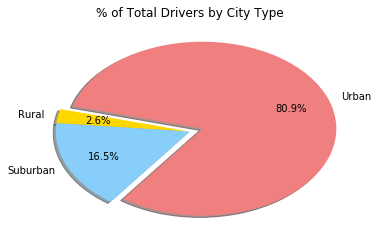

In [6]:
# Show Figure
plt.show()